In [27]:
pip install seaborn

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
caminho = 'C:\Cursos\Impacta\mba\DNSE2017.csv'

In [30]:
sinasc = pd.read_csv(caminho, dtype=str)

In [31]:
sinasc.head(5)

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,...,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,1,1,2415631,230440,1,24,2,4,999992,01,...,NaN,0,NaN,12,0,1,NaN,05,1,9
1,2,1,2005050,270030,1,34,5,4,622020,03,...,NaN,3,05042017,06,0,1,NaN,03,1,3
2,3,1,2005050,270030,1,19,2,4,622020,NaN,...,NaN,3,03042017,06,0,1,NaN,11,0,5
3,4,1,2005026,270030,1,19,2,4,999992,01,...,2,3,29042017,04,0,1,NaN,05,1,2
4,5,1,2722429,270400,1,16,1,4,999991,00,...,2,4,19042017,05,0,1,NaN,03,1,2


In [32]:
sinasc.QTDFILVIVO = pd.to_numeric(sinasc.QTDFILVIVO).astype(pd.Int64Dtype())
sinasc.QTDFILMORT = pd.to_numeric(sinasc.QTDFILMORT).astype(pd.Int64Dtype())
sinasc.SEMAGESTAC = pd.to_numeric(sinasc.SEMAGESTAC).astype(pd.Int64Dtype())

sinasc.PESO = pd.to_numeric(sinasc.PESO)
sinasc.IDADEMAE = pd.to_numeric(sinasc.IDADEMAE)
sinasc.IDADEPAI = pd.to_numeric(sinasc.IDADEPAI)
sinasc.APGAR1 = pd.to_numeric(sinasc.APGAR1)
sinasc.APGAR5 = pd.to_numeric(sinasc.APGAR5)

sinasc.CONSPRENAT = pd.to_numeric(sinasc.CONSPRENAT).astype(pd.Int64Dtype())
sinasc.SERIESCMAE = pd.to_numeric(sinasc.SERIESCMAE).astype(pd.Int64Dtype())
sinasc.QTDGESTANT = pd.to_numeric(sinasc.QTDGESTANT).astype(pd.Int64Dtype())
sinasc.QTDPARTCES = pd.to_numeric(sinasc.QTDPARTCES).astype(pd.Int64Dtype())
sinasc.QTDPARTNOR = pd.to_numeric(sinasc.QTDPARTNOR).astype(pd.Int64Dtype())

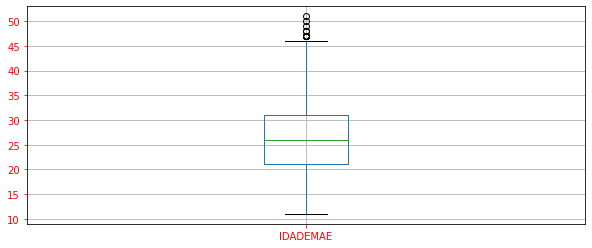

In [33]:
#1 - Fazer o boxplot para idade da mãe e encontrar quais os registro de outliers.

bp = sinasc.boxplot(column=['IDADEMAE'], figsize=(10,4))
bp.tick_params(colors='red')
bp.xaxis.label.set_color('red')
bp.yaxis.label.set_color('red')

In [34]:
#2 - Fazer o boxplot para o peso da criança e encontrar quais os registro de outliers.
q = sinasc.IDADEMAE.quantile([0.25, 0.75]).values
limit_inf = q[0] - (q[1] - q[0]) * 1.5
limit_sup = q[1] + (q[1] - q[0]) * 1.5

sinasc_outliers = sinasc[(sinasc.IDADEMAE < limit_inf) | (sinasc.IDADEMAE > limit_sup)]
sinasc_outliers[['IDADEMAE']]

,IDADEMAE
22,47
3110,47
3575,47
3922,49
8371,48
12520,47
17054,47
18699,48
20801,50
23171,47


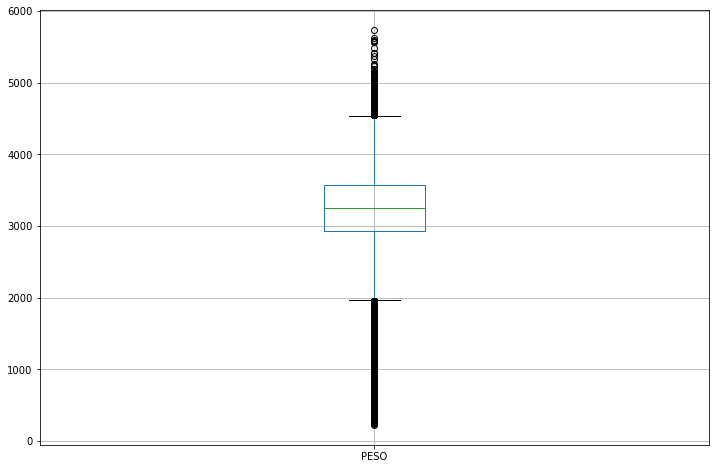

In [35]:
bp = sinasc.boxplot(column=['PESO'], figsize=(12,8))
bp.tick_params(colors='black')
bp.xaxis.label.set_color('black')
bp.yaxis.label.set_color('black')

AttributeError: 'Rectangle' object has no property 'legend'

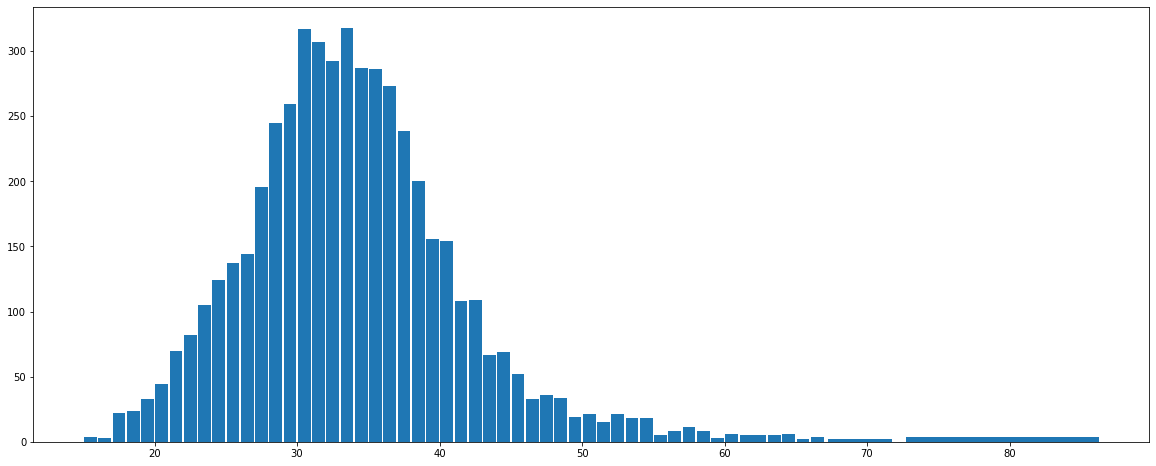

In [36]:
# 3 - Fazer o histograma da idade do pai
bins_values = sinasc.IDADEPAI.value_counts(sort=False)
hist = sinasc.hist(column='IDADEPAI', bins=sorted(bins_values.keys()), grid=False, figsize=(20,8), rwidth=0.9, legend=True)

hist[0][0].tick_params(colors='black')
hist[0][0].xaxis.label.set_color('black')
hist[0][0].yaxis.label.set_color('black')
r = hist[0][0].set_xlabel('Idade')
r = hist[0][0].set_ylabel('Feq')
r = hist[0][0].set_ylabel('Feq')

x_ticks = []
for key, value in bins_values.items():
    x_ticks.append(key)
    hist[0][0].text(key+0.5, value+5, int(value), ha='center')
t = hist[0][0].set_xticks(x_ticks)

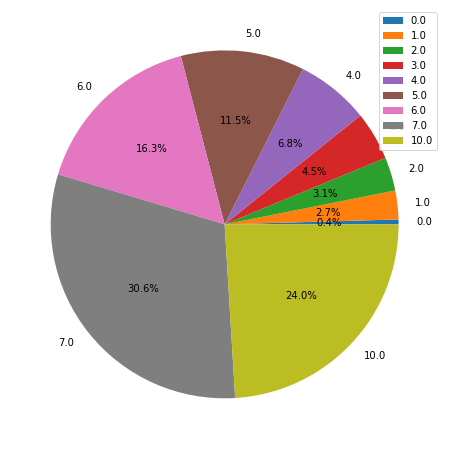

In [37]:
#Representar visualmente os diferentes valores de APGAR1 e APGAR5
#APGAR1
grupo = sinasc[(sinasc.APGAR1 != 8) & (sinasc.APGAR1 != 9)].groupby(by='APGAR1').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(20,8))
r = pizza.set(xlabel='', ylabel='')

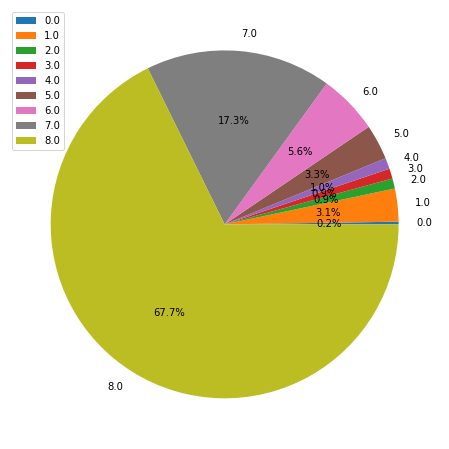

In [38]:
#APGAR5
grupo = sinasc[(sinasc.APGAR5 < 9)].groupby(by='APGAR5').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(20,8))
r = pizza.set(xlabel='', ylabel='')

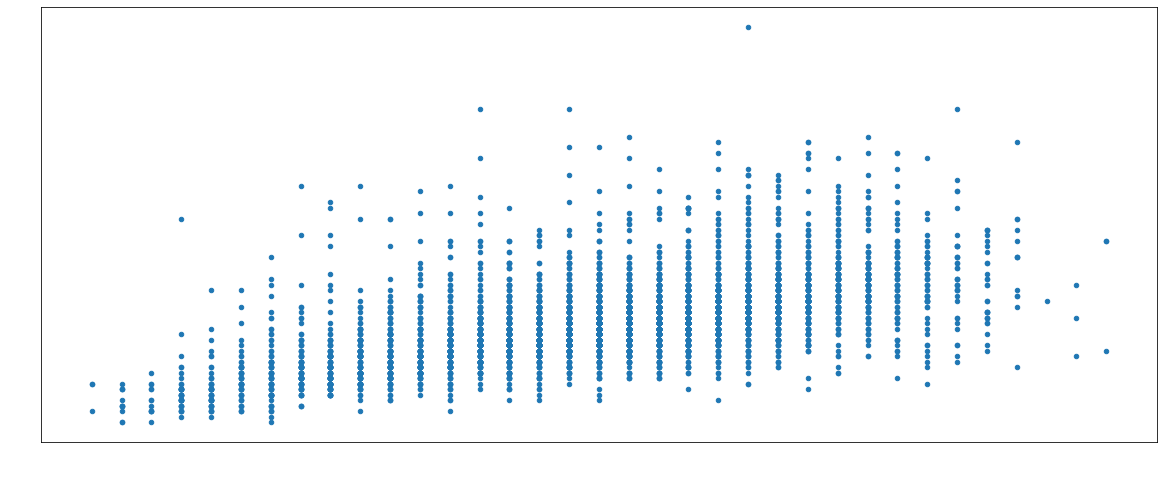

In [57]:
#5 - Mostrar a dispersão entre idade do pai e idade da mãe
idades = sinasc[(sinasc.IDADEPAI.notna())][['IDADEMAE', 'IDADEPAI']]
disp = idades.plot(kind='scatter',x='IDADEMAE', y='IDADEPAI', figsize=(20,8))
disp.tick_params(colors='white')
disp.xaxis.label.set_color('white')
disp.yaxis.label.set_color('white')

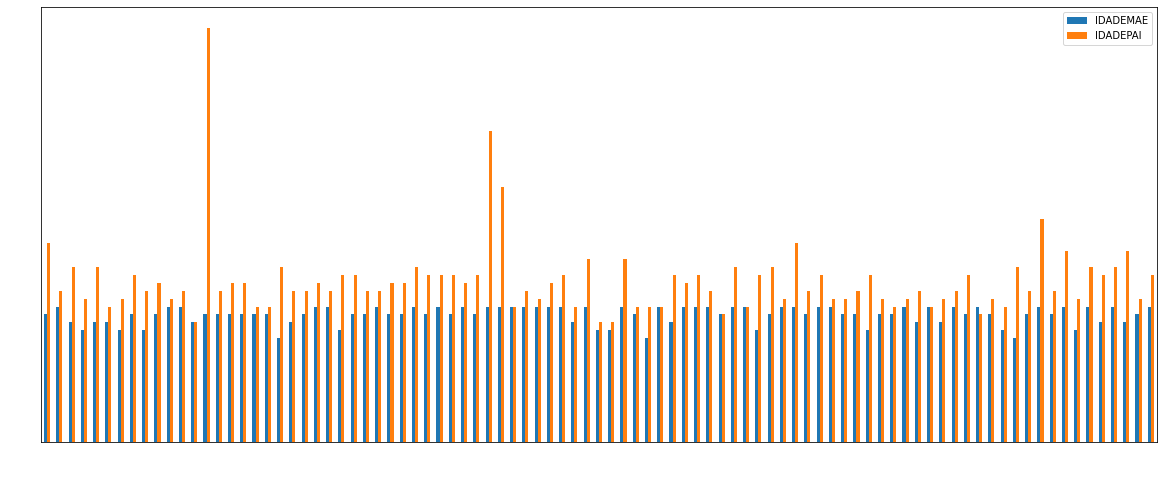

In [58]:
#6 - Mostrar visualmente a comparação entre idade da mãe e idade do pai para as mães solteiras com menos de 18 anos
idades = sinasc[(sinasc.IDADEMAE < 18) & (sinasc.ESTCIVMAE== '1') & (sinasc.IDADEPAI.notna())][['IDADEMAE', 'IDADEPAI']]
barras = idades.plot(kind='bar', width=0.5, figsize=(20,8))
barras.tick_params(colors='white')
barras.xaxis.label.set_color('white')
barras.yaxis.label.set_color('white')
r = barras.set(xlabel='Observação', ylabel='Idade')

In [60]:
#7 - Comparar a frequência dos anos de escolaridade das mães para que residem na capital (Aracajú, CODMUNRES 2800308) e das mães em outras cidades (outros CODMUNRES).

capital = sinasc[sinasc.CODMUNRES == '280030']
outras = sinasc[sinasc.CODMUNRES != '280030']

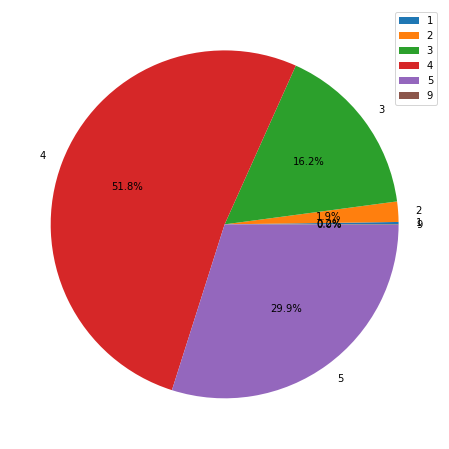

In [61]:
grupo = capital.groupby(by='ESCMAE').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(20,8))
r = pizza.set(xlabel='', ylabel='')

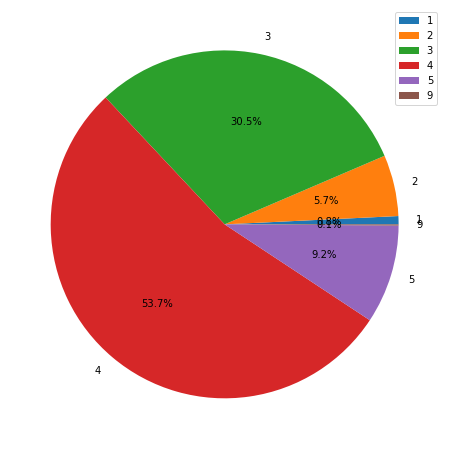

In [62]:
# gráfico de pizza de outras cidades
grupo = outras.groupby(by='ESCMAE').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(20,8))
r = pizza.set(xlabel='', ylabel='')